In [ ]:
# To run locally, I recommend:
# Download and Instal Miniconda (a version of Anaconda adjusted to universities with slow wi-fi)
# then open Anaconda Prompt and
#   conda create -n <some name for your env, for example bsip-2024>
#   conda bsip-2024 activate
#   conda bsip-2024 install <dependencies like matplotlib, numpy...>
#   pip install open-cv python
# then just run a notebook in jupyter or visual studio code etc. and select bsip-2024 as the kernel

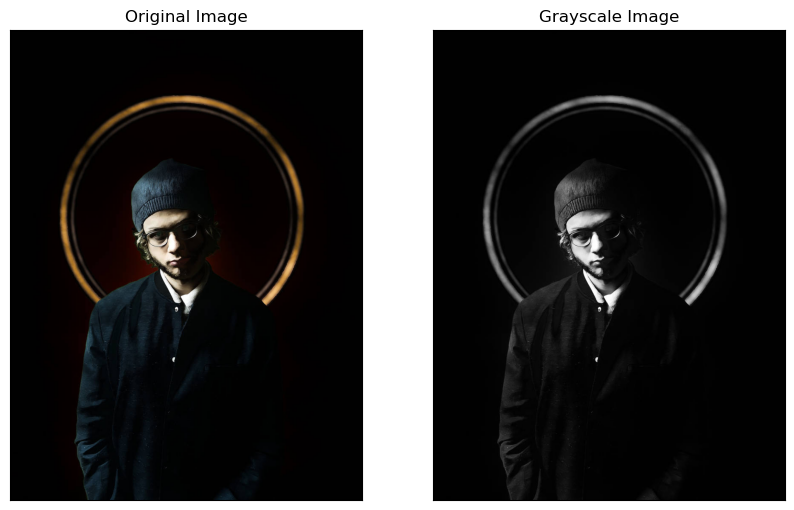

In [6]:
import cv2
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg')
# Convert the image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the images
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2), plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])

plt.show()


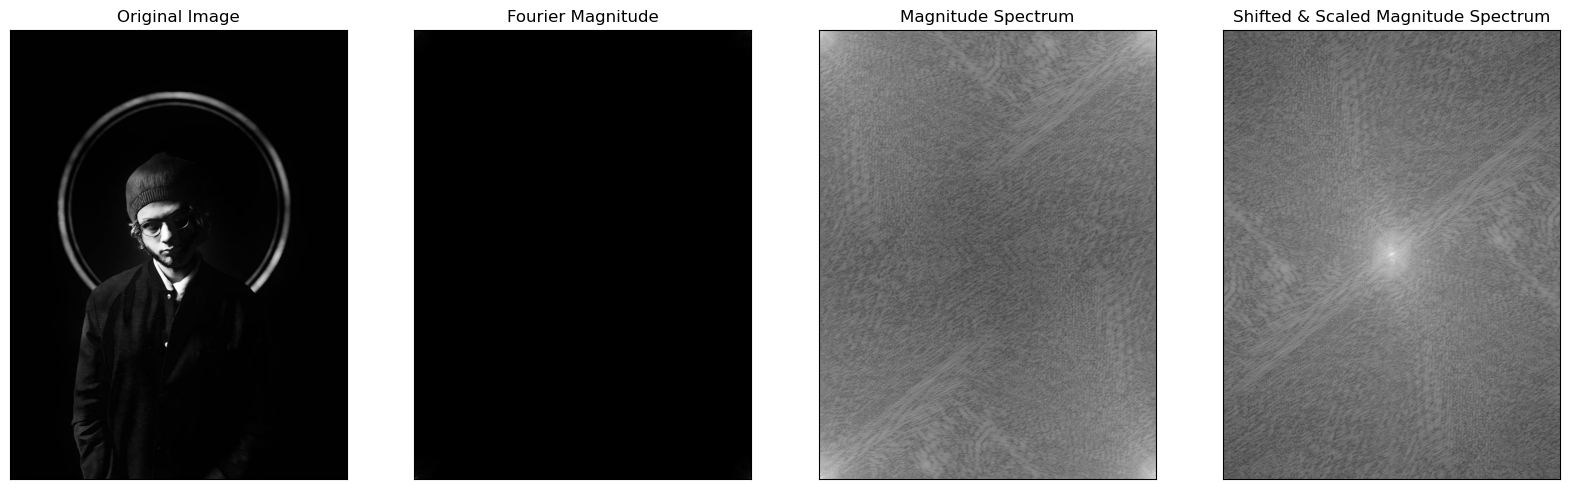

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Compute the Fourier magnitude
fourier_magnitude = np.abs(F)

# Compute the magnitude spectrum of the image
magnitude_spectrum = 20*np.log(fourier_magnitude+1)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Compute the shifted magnitude spectrum of the image
magnitude_spectrum_shifted = 20*np.log(np.abs(F_shift)+1)

# Scale the shifted magnitude spectrum back to [0, 1]
min_val = np.min(magnitude_spectrum_shifted)
max_val = np.max(magnitude_spectrum_shifted)
magnitude_spectrum_scaled = (magnitude_spectrum_shifted - min_val) / (max_val - min_val)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,4,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,2), plt.imshow(fourier_magnitude, cmap='gray')
plt.title('Fourier Magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,3), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,4), plt.imshow(magnitude_spectrum_scaled, cmap='gray')
plt.title('Shifted & Scaled Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()


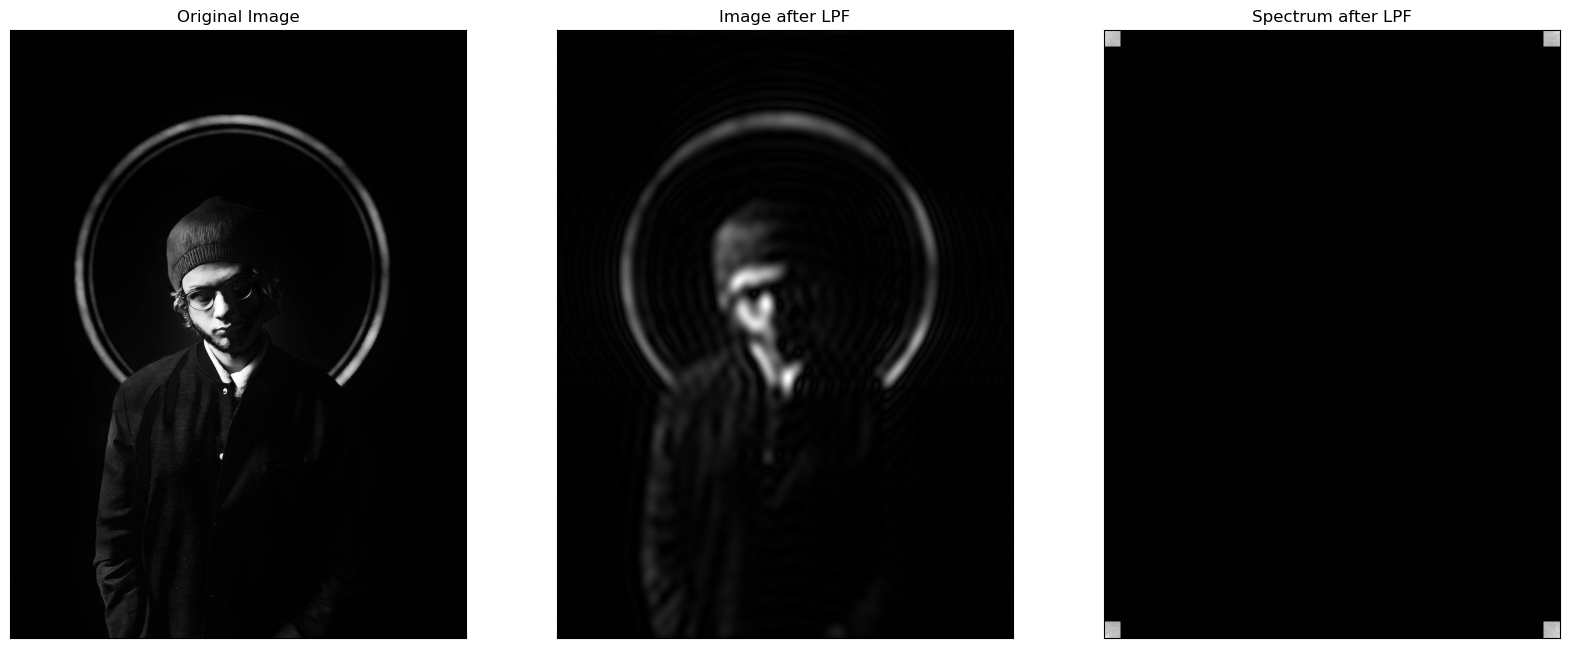

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Create a low pass filter mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Apply the mask and inverse DFT
F_shift = F_shift*mask
f_ishift = np.fft.ifftshift(F_shift)
img_back = np.fft.ifft2(f_ishift)

# Compute the magnitude spectrum of the filtered image
magnitude_spectrum = 20*np.log(np.abs(f_ishift)+1)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectrum after LPF'), plt.xticks([]), plt.yticks([])

plt.show()


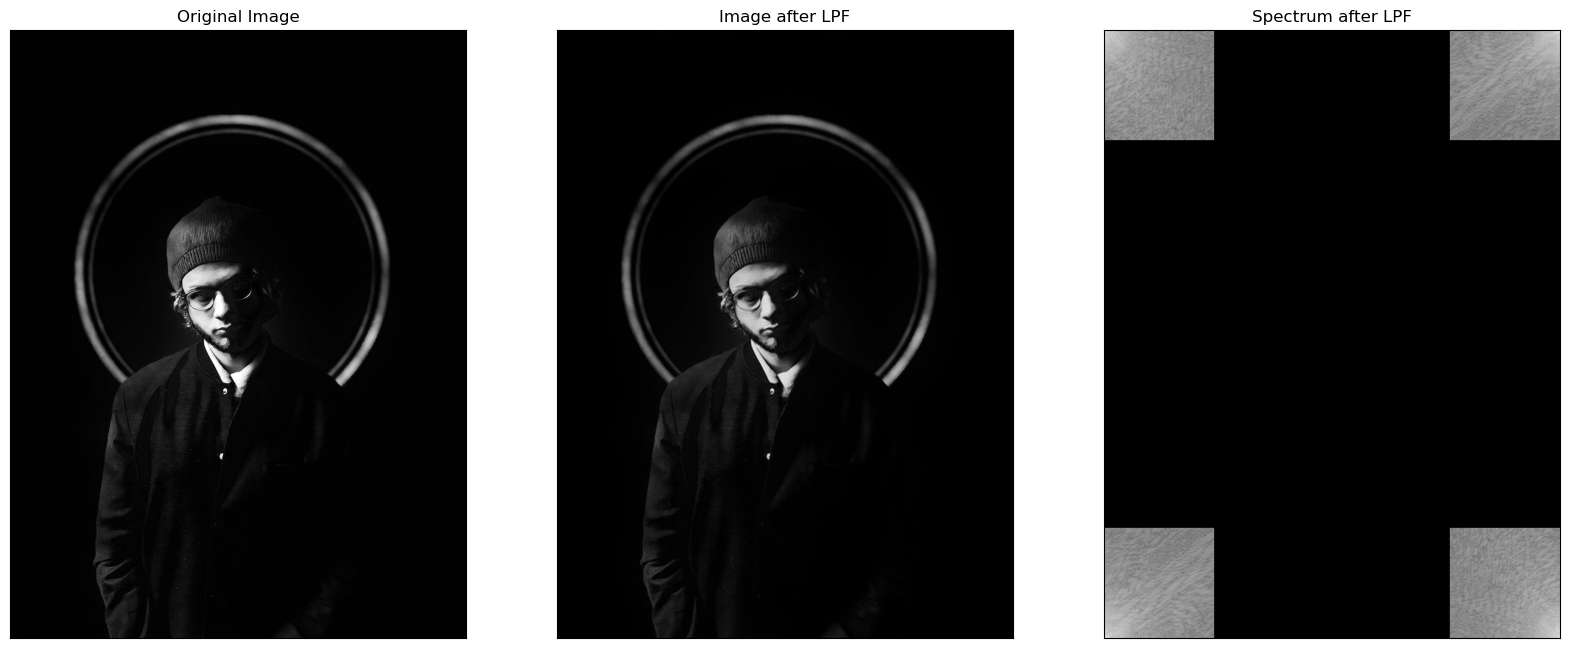

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Create a low pass filter mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols),np.uint8)
FILTER_THRESHOLD = 200
mask[crow-FILTER_THRESHOLD:crow+FILTER_THRESHOLD, ccol-FILTER_THRESHOLD:ccol+FILTER_THRESHOLD] = 1

# Apply the mask and inverse DFT
F_shift = F_shift*mask
f_ishift = np.fft.ifftshift(F_shift)
img_back = np.fft.ifft2(f_ishift)

# Compute the magnitude spectrum of the filtered image
magnitude_spectrum = 20*np.log(np.abs(f_ishift)+1)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectrum after LPF'), plt.xticks([]), plt.yticks([])

plt.show()


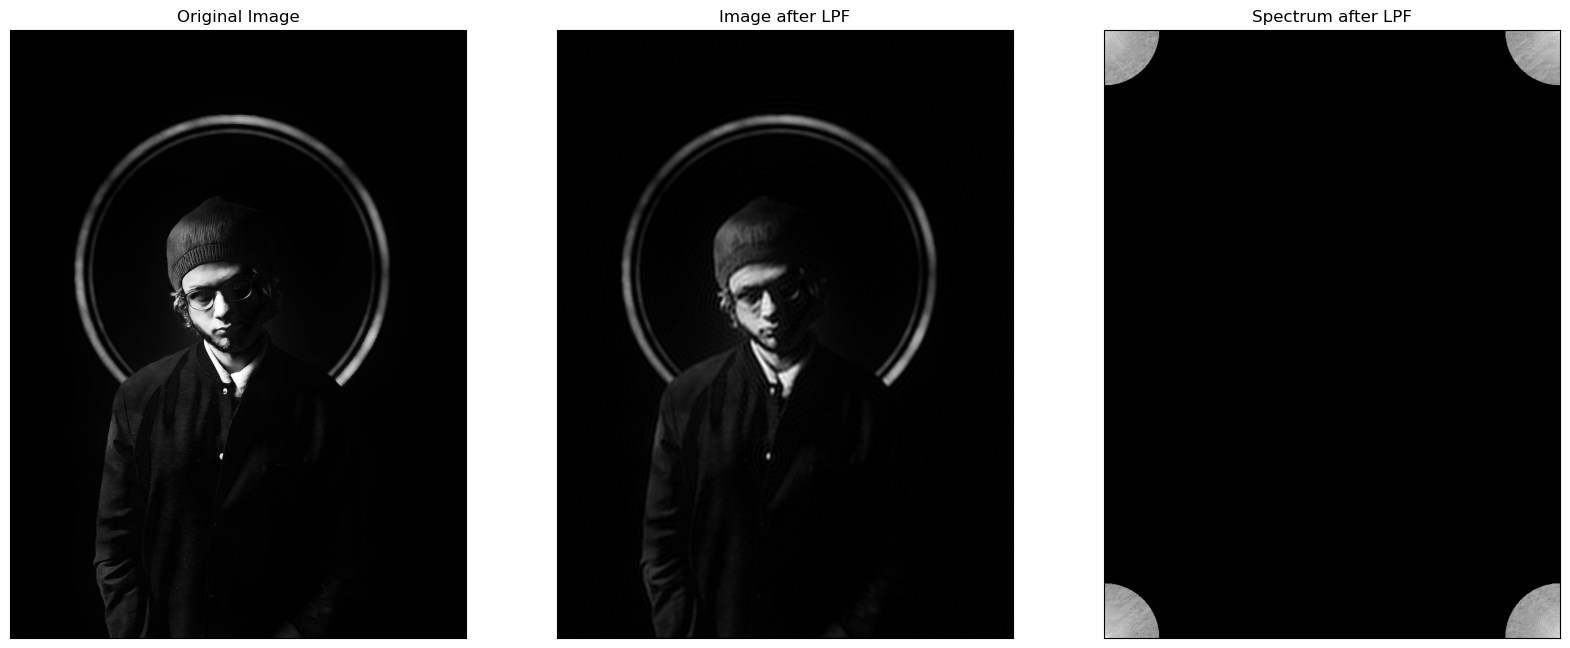

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Create a circular low pass filter mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

# create a mask first, center circle is 1, remaining all zeros
radius = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius**2
mask = np.zeros((rows,cols),np.uint8)
mask[mask_area] = 1

# Apply the mask and inverse DFT
F_shift = F_shift*mask
f_ishift = np.fft.ifftshift(F_shift)
img_back = np.fft.ifft2(f_ishift)

# Compute the magnitude spectrum of the filtered image
magnitude_spectrum = 20*np.log(np.abs(f_ishift)+1)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectrum after LPF'), plt.xticks([]), plt.yticks([])

plt.show()


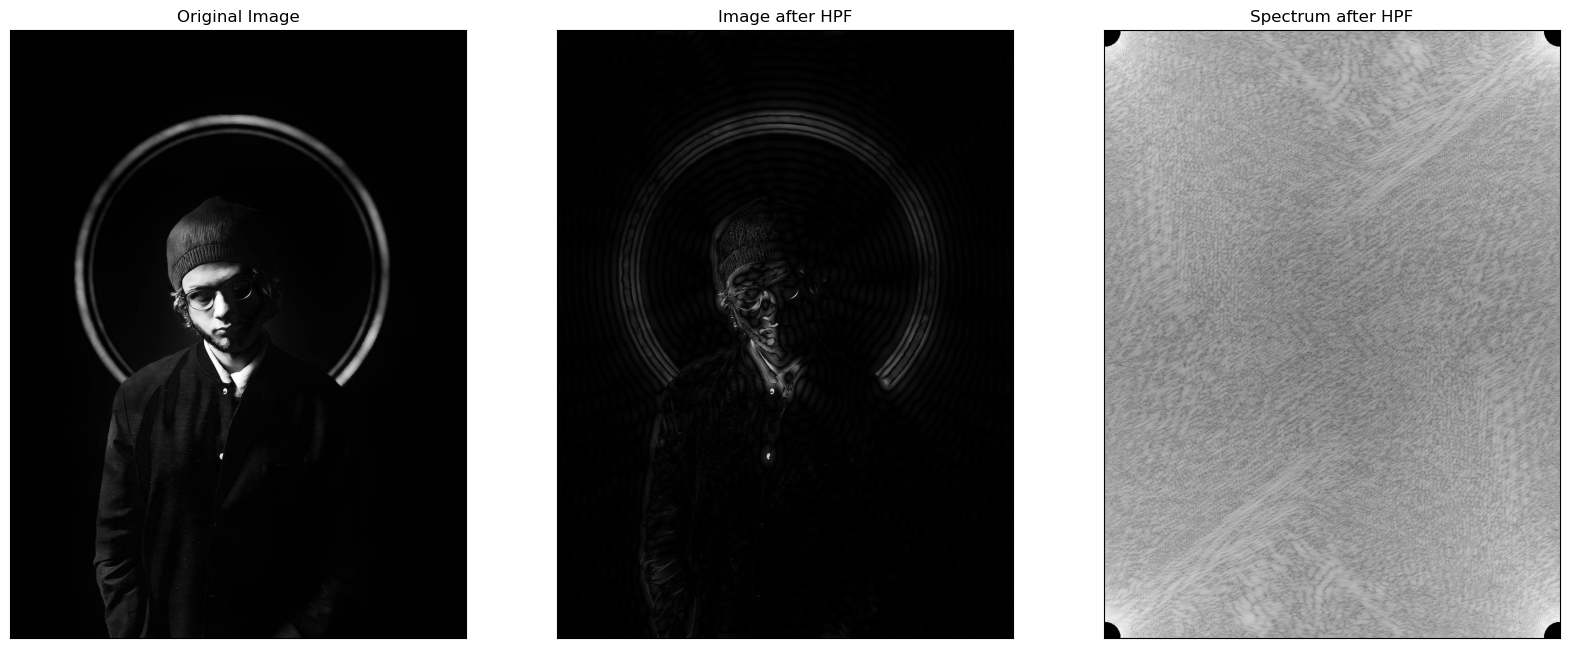

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Create a circular high pass filter mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

# create a mask first, center circle is 0, remaining all ones
radius = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius**2
mask = np.ones((rows,cols),np.uint8)
mask[mask_area] = 0

# Apply the mask and inverse DFT
F_shift = F_shift*mask
f_ishift = np.fft.ifftshift(F_shift)
img_back = np.fft.ifft2(f_ishift)

# Compute the magnitude spectrum of the filtered image
magnitude_spectrum = 20*np.log(np.abs(f_ishift)+1)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectrum after HPF'), plt.xticks([]), plt.yticks([])

plt.show()


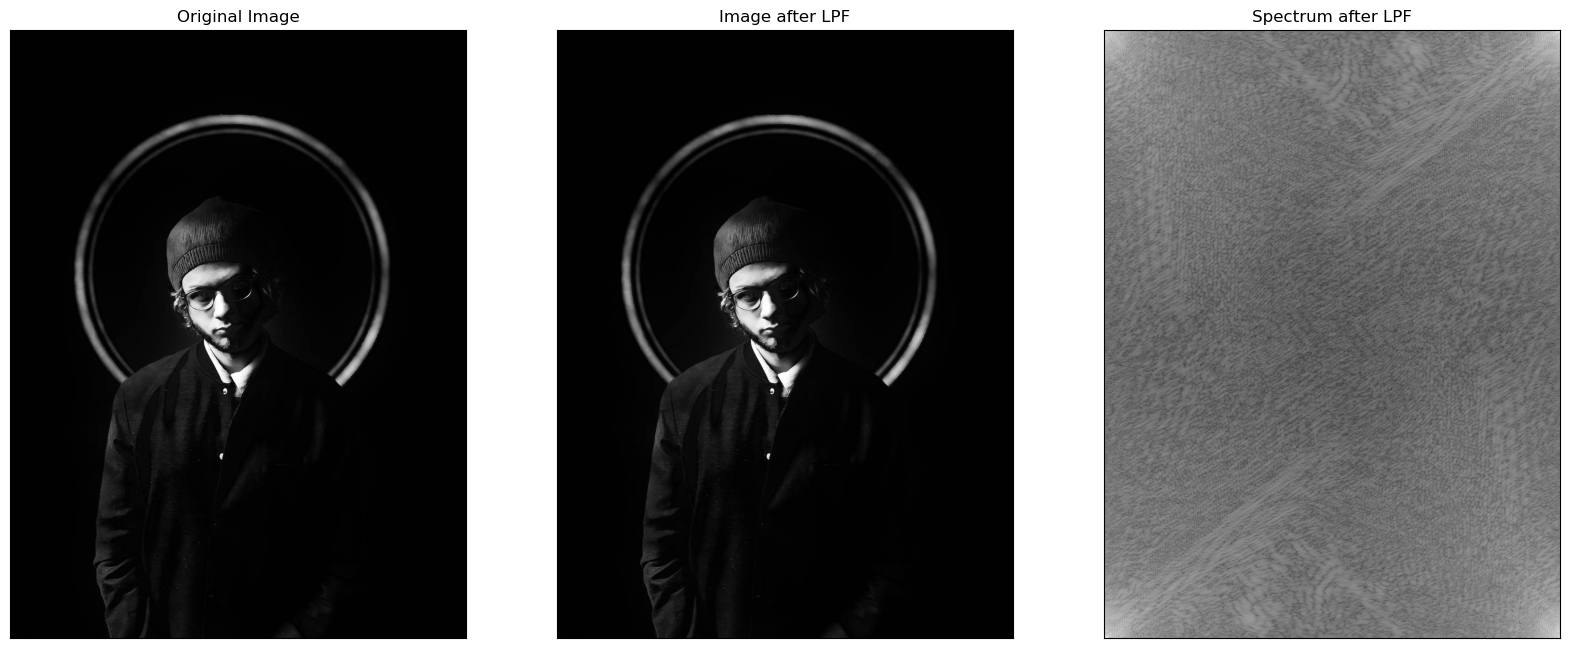

In [18]:
# no shift
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Create a circular low pass filter mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

# create a mask first, center circle is 0, remaining all ones
radius = 30
corner = [0, 0]  # Top-left corner
x, y = np.ogrid[:rows, :cols]
mask_area = (x - corner[0])**2 + (y - corner[1])**2 <= radius**2
mask = np.ones((rows,cols),np.uint8)
mask[mask_area] = 1

# Apply the mask and inverse DFT
F = F*mask
img_back = np.fft.ifft2(F)

# Compute the magnitude spectrum of the filtered image
magnitude_spectrum = 20*np.log(np.abs(F)+1)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectrum after LPF'), plt.xticks([]), plt.yticks([])

plt.show()


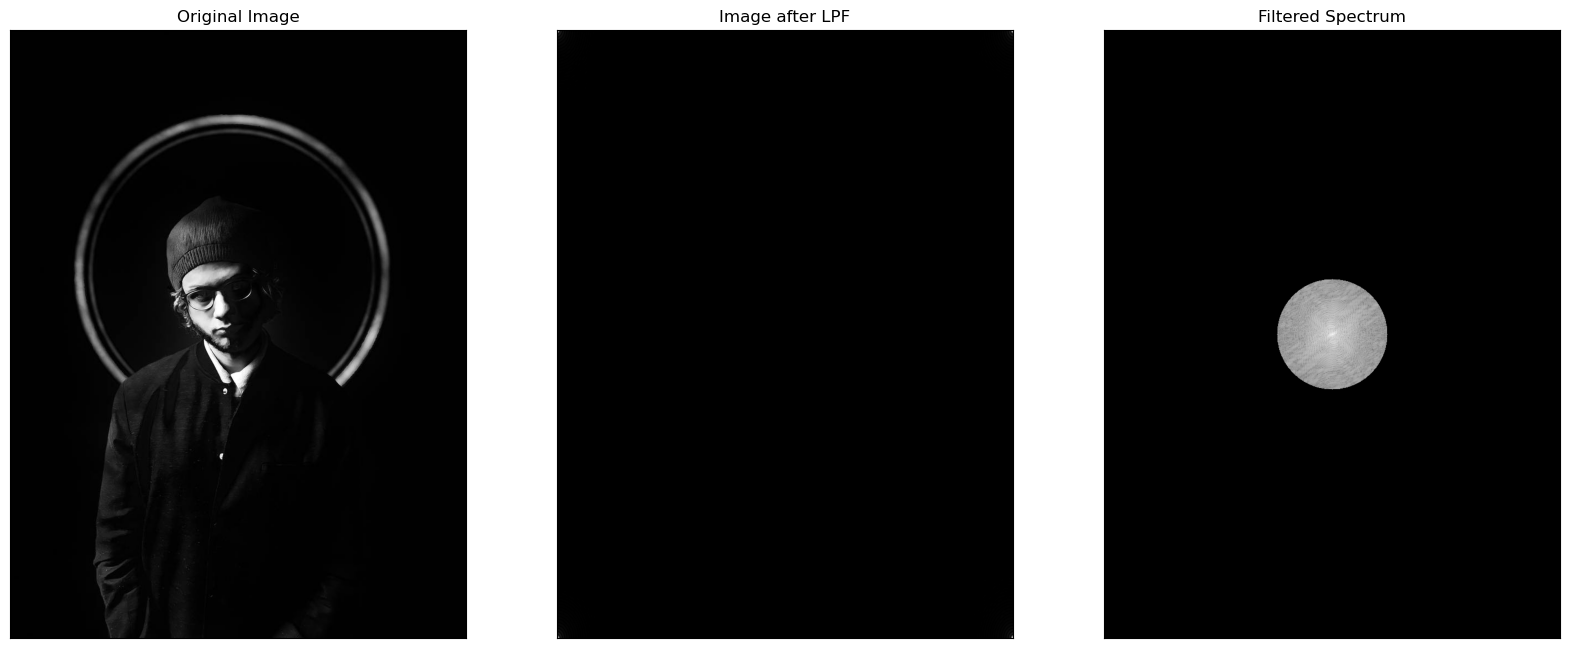

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Compute the magnitude spectrum and scale it
magnitude_spectrum = 20*np.log(np.abs(F_shift)+1)

# Create a circular mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

# create a mask first, center circle is 1, remaining all zeros
radius = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius**2
mask = np.zeros((rows,cols),np.uint8)
mask[mask_area] = 1

# Apply the mask to the magnitude spectrum
filtered_spectrum = magnitude_spectrum * mask

# Shift the filtered spectrum back to the original arrangement
F_ishift = np.fft.ifftshift(filtered_spectrum)

# Compute the inverse DFT to get the filtered image
img_back = np.fft.ifft2(F_ishift)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3), plt.imshow(filtered_spectrum, cmap='gray')
plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()


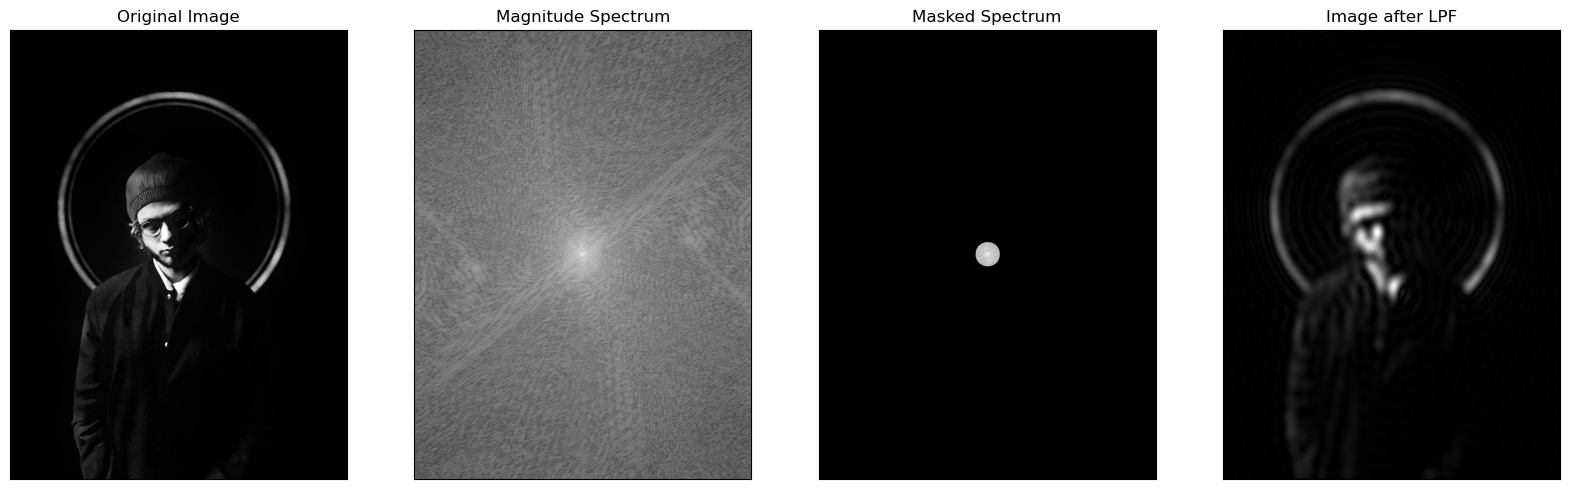

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Compute the magnitude spectrum and scale it
magnitude_spectrum = 20*np.log(np.abs(F_shift)+1)

# Create a circular mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

# create a mask first, center circle is 1, remaining all zeros
radius = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius**2
mask = np.zeros((rows,cols),np.uint8)
mask[mask_area] = 1

# Apply the mask to the shifted Fourier Transform
F_shift_masked = F_shift * mask

# Compute the magnitude spectrum of the masked Fourier Transform and scale it
masked_spectrum = 20*np.log(np.abs(F_shift_masked)+1)

# Shift the masked Fourier Transform back to the original arrangement
F_ishift = np.fft.ifftshift(F_shift_masked)

# Compute the inverse DFT to get the filtered image
img_back = np.fft.ifft2(F_ishift)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,4,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,3), plt.imshow(masked_spectrum, cmap='gray')
plt.title('Masked Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,4), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.show()


In [ ]:
# Explanation of Python awsomeness:
#     mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2 
#       This line is defining a condition to create a circular area. The variables x and y are assumed to be arrays representing the x and y coordinates of each pixel in the image. The center is a tuple or list containing the x and y coordinates of the center of the circle, and r is the radius of the circle. The expression (x - center[0])**2 + (y - center[1])**2 calculates the squared distance of each pixel from the center of the circle. If this distance is less than or equal to r**2 (the square of the radius), the pixel lies inside the circle.
#     mask = np.ones((rows,cols),np.uint8) 
#       This line creates a 2D array (or mask) of shape (rows, cols) filled with ones. The data type np.uint8 is an 8-bit unsigned integer, which is a common data type for images. This mask is initially set to all ones, which typically represents the white color in a binary image.
#     mask[mask_area] = 0 
#       Here, the mask is being updated. The mask_area condition is used as an index to the mask array. For all the positions where mask_area is True (meaning the pixels that lie inside the circular area), the value is set to 0. In a binary mask, zero typically represents the black color.

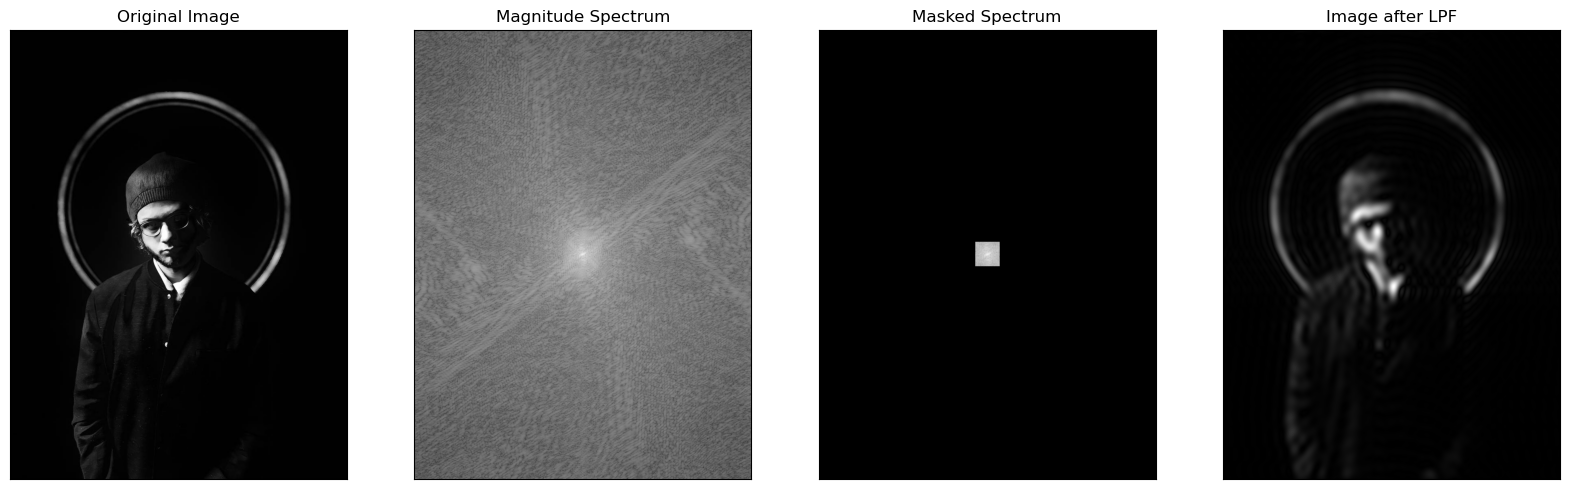

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Compute the magnitude spectrum and scale it
magnitude_spectrum = 20*np.log(np.abs(F_shift)+1)

# Create a rectangular mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

# create a mask first, rectangle is 1, remaining all zeros
mask = np.zeros((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Apply the mask to the shifted Fourier Transform
F_shift_masked = F_shift * mask

# Compute the magnitude spectrum of the masked Fourier Transform and scale it
masked_spectrum = 20*np.log(np.abs(F_shift_masked)+1)

# Shift the masked Fourier Transform back to the original arrangement
F_ishift = np.fft.ifftshift(F_shift_masked)

# Compute the inverse DFT to get the filtered image
img_back = np.fft.ifft2(F_ishift)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,4,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,3), plt.imshow(masked_spectrum, cmap='gray')
plt.title('Masked Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,4), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.show()


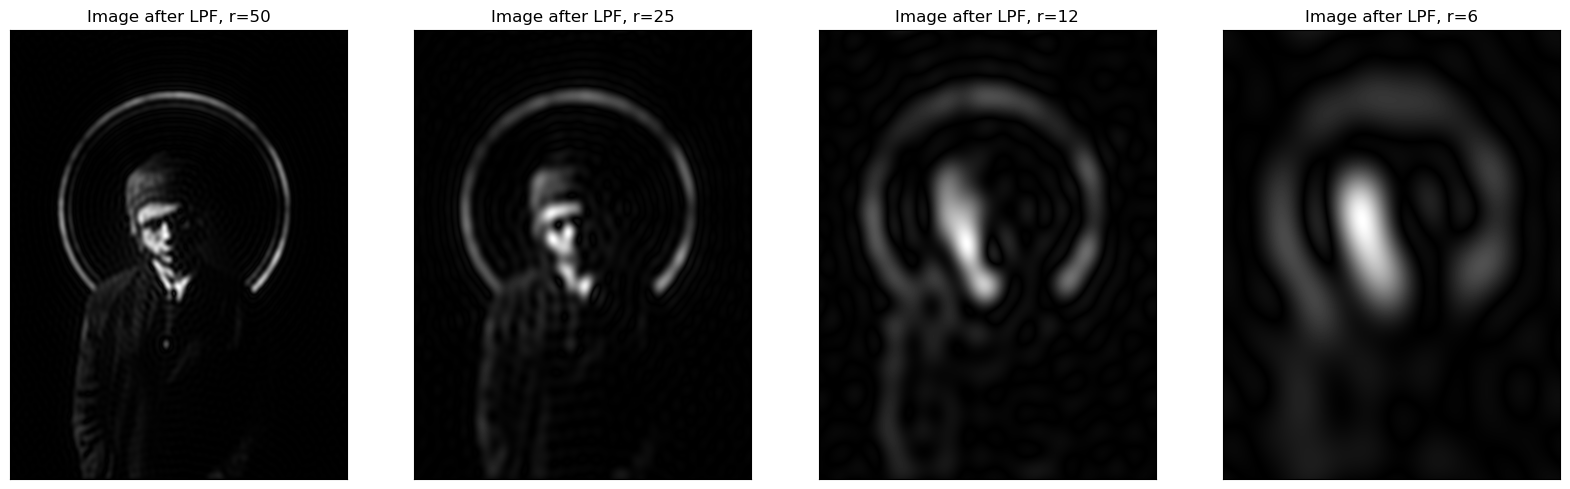

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Create a circular mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

radius = [50, 25, 12, 6]

plt.figure(figsize=(20,20))

for i, r in enumerate(radius):
    # create a mask first, center circle is 1, remaining all zeros
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
    mask = np.zeros((rows,cols),np.uint8)
    mask[mask_area] = 1

    # Apply the mask to the shifted Fourier Transform
    F_shift_masked = F_shift * mask

    # Shift the masked Fourier Transform back to the original arrangement
    F_ishift = np.fft.ifftshift(F_shift_masked)

    # Compute the inverse DFT to get the filtered image
    img_back = np.fft.ifft2(F_ishift)

    # Display the images
    plt.subplot(1,4,i+1), plt.imshow(np.abs(img_back), cmap='gray')
    plt.title('Image after LPF, r={}'.format(r)), plt.xticks([]), plt.yticks([])

plt.show()


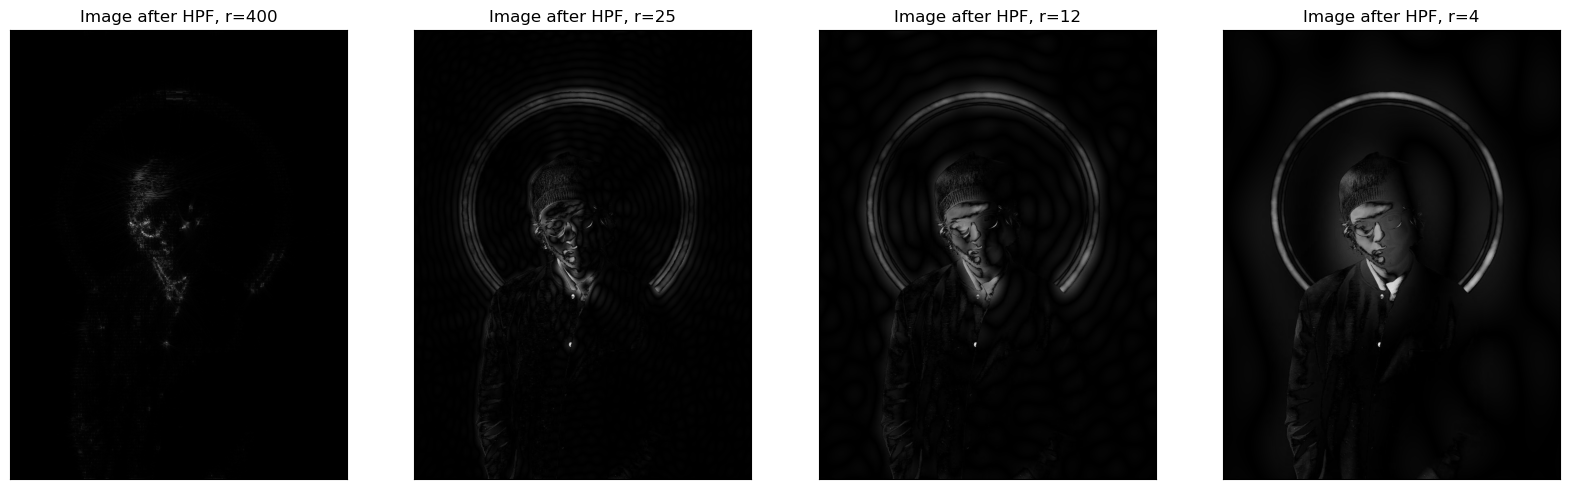

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Create a circular mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

radius = [400, 25, 12, 4]

plt.figure(figsize=(20,20))

for i, r in enumerate(radius):
    # create a mask first, center circle is 0, remaining all ones
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
    mask = np.ones((rows,cols),np.uint8)
    mask[mask_area] = 0

    # Apply the mask to the shifted Fourier Transform
    F_shift_masked = F_shift * mask

    # Shift the masked Fourier Transform back to the original arrangement
    F_ishift = np.fft.ifftshift(F_shift_masked)

    # Compute the inverse DFT to get the filtered image
    img_back = np.fft.ifft2(F_ishift)

    # Display the images
    plt.subplot(1,4,i+1), plt.imshow(np.abs(img_back), cmap='gray')
    plt.title('Image after HPF, r={}'.format(r)), plt.xticks([]), plt.yticks([])

plt.show()


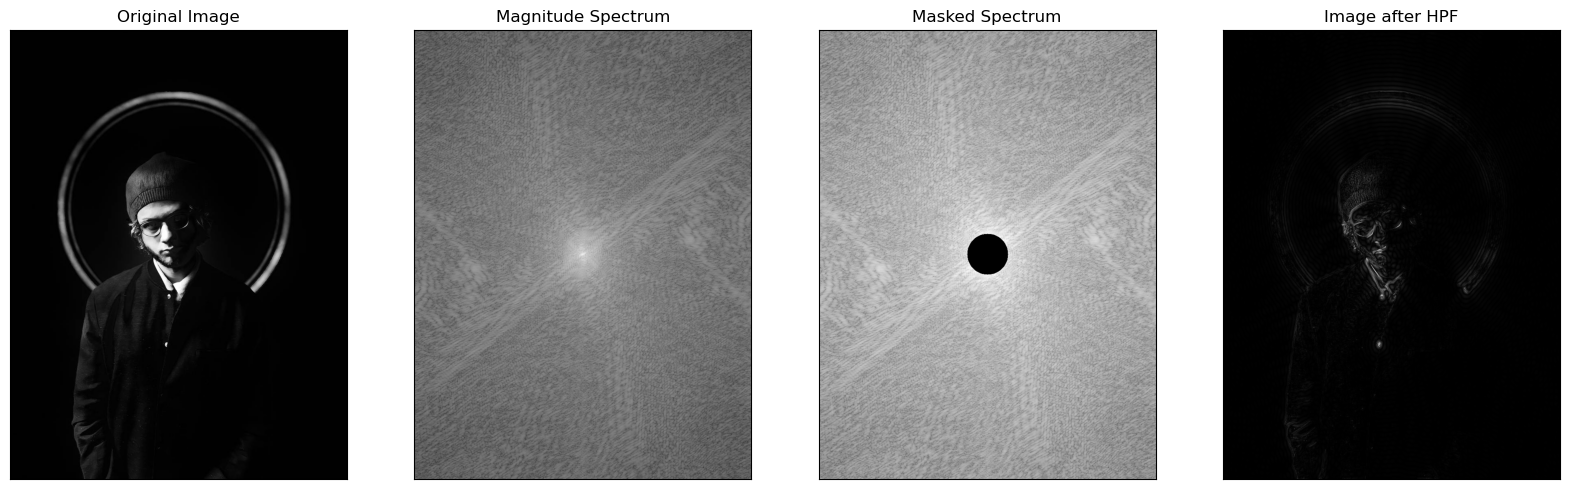

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('test_img.jpg',0)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Compute the magnitude spectrum and scale it
magnitude_spectrum = 20*np.log(np.abs(F_shift)+1)

# Create a circular mask
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) # center

# create a mask first, center circle is 0, remaining all ones
radius = 50
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius**2
mask = np.ones((rows,cols),np.uint8)
mask[mask_area] = 0

# Apply the mask to the shifted Fourier Transform
F_shift_masked = F_shift * mask

# Compute the magnitude spectrum of the masked Fourier Transform and scale it
masked_spectrum = 20*np.log(np.abs(F_shift_masked)+1)

# Shift the masked Fourier Transform back to the original arrangement
F_ishift = np.fft.ifftshift(F_shift_masked)

# Compute the inverse DFT to get the filtered image
img_back = np.fft.ifft2(F_ishift)

# Display the images
plt.figure(figsize=(20,20))

plt.subplot(1,4,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,3), plt.imshow(masked_spectrum, cmap='gray')
plt.title('Masked Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,4), plt.imshow(np.abs(img_back), cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()


In [ ]:
# note: you can also achieve high pass with substracting low pass from orig
# matlab: if(norm([i, j] - center))... to calc circle rad

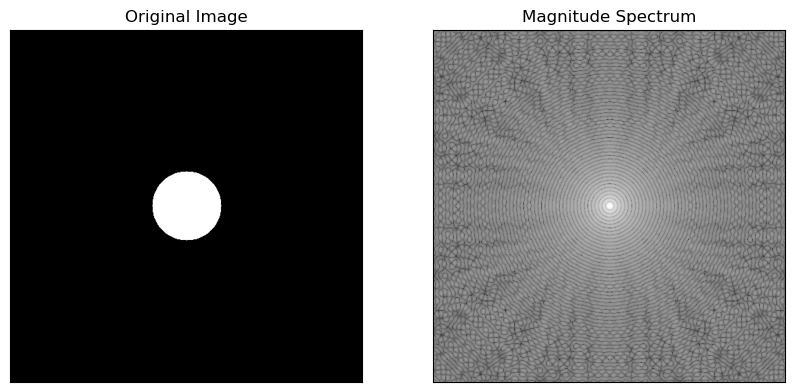

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Create a black square
img = np.zeros((512,512),np.uint8)

# Create a white circle in the middle of the square
cv2.circle(img, (256,256), 50, (255,255,255), -1)

# Compute the 2-dimensional discrete Fourier Transform
F = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
F_shift = np.fft.fftshift(F)

# Compute the magnitude spectrum and scale it
magnitude_spectrum = 20*np.log(np.abs(F_shift)+1)

# Display the images
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()


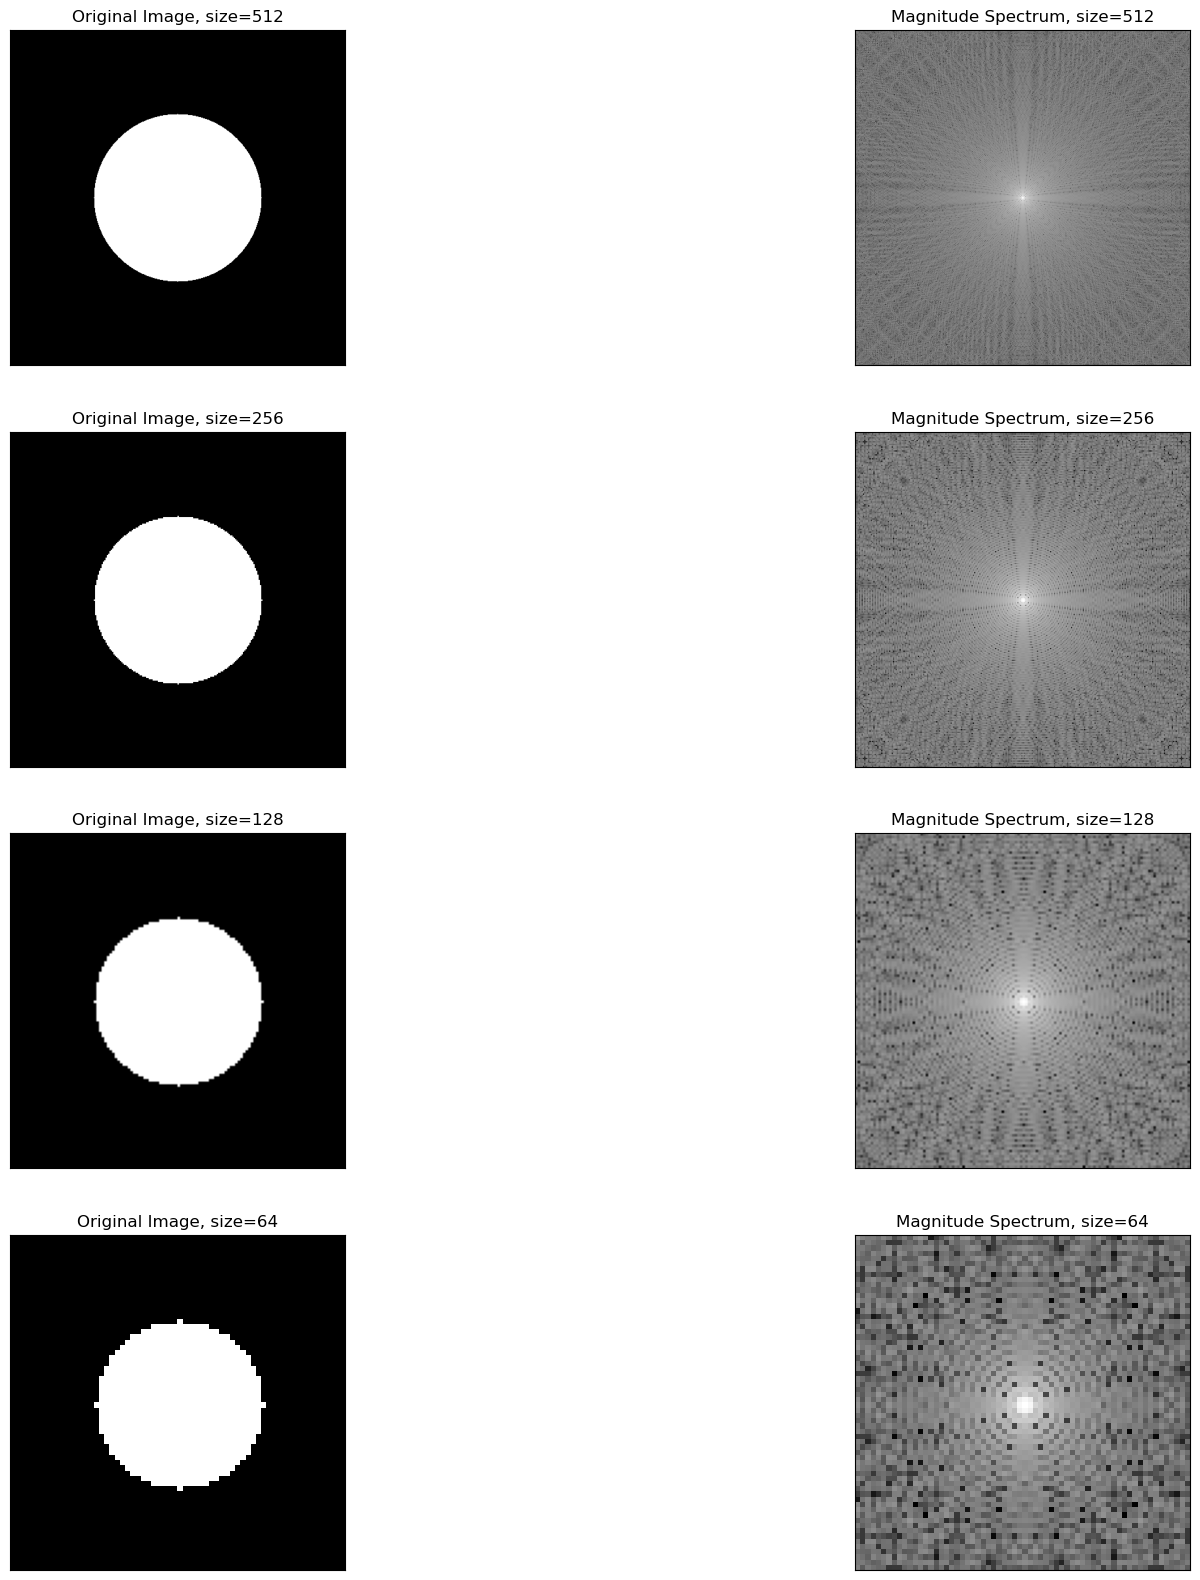

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define the sizes of the images
sizes = [512, 256, 128, 64]

plt.figure(figsize=(20,20))

for i, size in enumerate(sizes):
    # Create a black square
    img = np.zeros((size,size),np.uint8)

    # Create a white circle in the middle of the square
    cv2.circle(img, (size//2, size//2), size//4, (255,255,255), -1)

    # Compute the 2-dimensional discrete Fourier Transform
    F = np.fft.fft2(img)

    # Shift the zero-frequency component to the center of the spectrum
    F_shift = np.fft.fftshift(F)

    # Compute the magnitude spectrum and scale it
    magnitude_spectrum = 20*np.log1p(np.abs(F_shift))

    # Display the images
    plt.subplot(4,2,2*i+1), plt.imshow(img, cmap='gray')
    plt.title('Original Image, size={}'.format(size)), plt.xticks([]), plt.yticks([])

    plt.subplot(4,2,2*i+2), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum, size={}'.format(size)), plt.xticks([]), plt.yticks([])

plt.show()
